In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read the train dataset
df=pd.read_csv("train.csv")
dataset=df.copy()
#We will build our preprocessedDataset step by step
preprocessedDataset=pd.DataFrame()
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
#Let's see features
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64


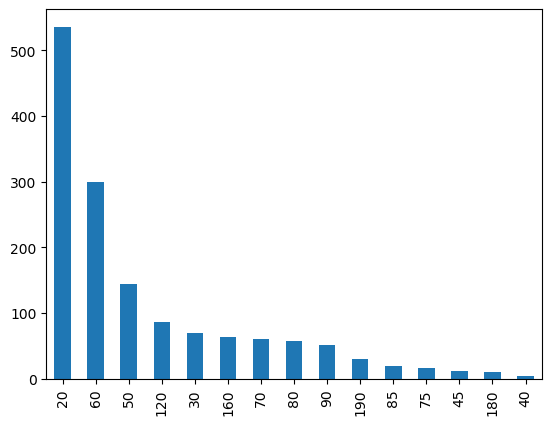

In [4]:
#ID feature is not informative for ML model, so we ignore it,but only used for identifying houses in the last prediction section
#First Feature : MSSubClass : Categorical-Nominal Data, type :int64
"""
MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES
"""
print(dataset["MSSubClass"].unique())
print(dataset["MSSubClass"].value_counts())
dataset["MSSubClass"].value_counts().plot(kind='bar')
plt.show()

In [5]:
MSSubClass=dataset.MSSubClass.copy()
MSSubClass.isna().sum()

0

In [6]:
#We will semantically group categories 
#the categories; [20,30,40,120], [45,50,150], [60,70,75,160],[80,85,90,180,190] 
#=>With respect to the data description, train data does not include example of 150,
#anyway we will include into group due to probability of seeing in test data.

#Get dummies
MSSubClass_columns = pd.get_dummies(dataset["MSSubClass"])
MSSubClassGroup1=MSSubClass_columns[[20,30,40,120]].max(axis=1)
try:
    MSSubClassGroup2=MSSubClass_columns[[45,50,150]].max(axis=1)
except:
    MSSubClassGroup2=MSSubClass_columns[[45,50]].max(axis=1)
MSSubClassGroup3=MSSubClass_columns[[60,70,75,160]].max(axis=1)
MSSubClassGroup4=MSSubClass_columns[[80,85,90,180,190]].max(axis=1)
preprocessedDataset["MSSubClassGroup1"]=MSSubClassGroup1.copy()
preprocessedDataset["MSSubClassGroup2"]=MSSubClassGroup2.copy()
preprocessedDataset["MSSubClassGroup3"]=MSSubClassGroup3.copy()
preprocessedDataset["MSSubClassGroup4"]=MSSubClassGroup4.copy()


['RL' 'RM' 'C (all)' 'FV' 'RH']
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


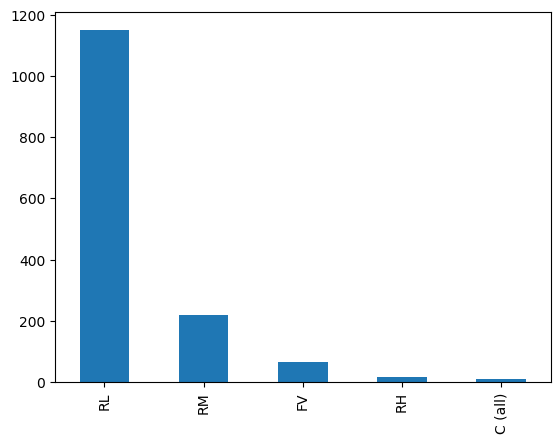

In [7]:
#Next Feature : MSZoning : Identifies the general zoning classification of the sale. Categorical-Nominal Data, type :str
"""
MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
"""
print(dataset["MSZoning"].unique())
print(dataset["MSZoning"].value_counts())
dataset["MSZoning"].value_counts().plot(kind='bar')
plt.show()

In [8]:
MSZoning=dataset.MSZoning.copy()
MSZoning.isna().sum()

0

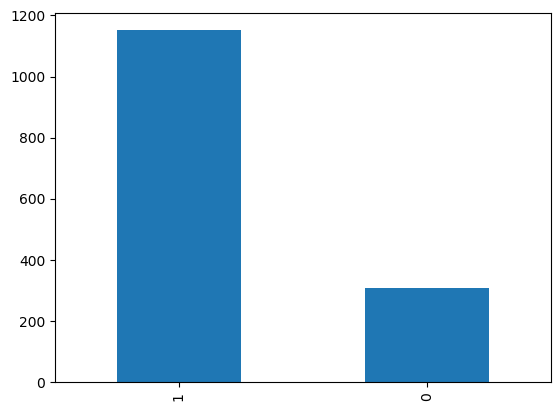

In [9]:
#According to the zoning hist and results, there are 5 cotegories and mostly balanced on RL	Residential Low Density (RL)
#So we will divide it on two binary categories which RL:1 and others:0
MSZoning=MSZoning.map({"RL":1,'RM':0,'C (all)':0, 'FV':0, 'RH':0,'A':0,'I':0,'RP':0})
#Let's see the result
MSZoning.value_counts().plot(kind='bar')
plt.show()

In [11]:
#Add MSZoning on preprocessedDataset
preprocessedDataset["MSZoning"]=MSZoning.copy()

In [ ]:
#Next Feature : LotFrontage: Continious-Ratio type:
